In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as graph
import seaborn as sns

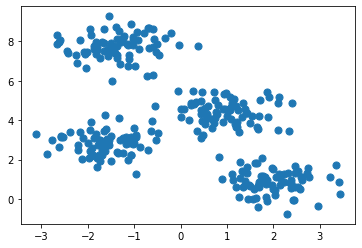

In [5]:
from sklearn.datasets import make_blobs

x, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

graph.scatter(x[:, 0], x[:, 1], s=50)
graph.show()

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

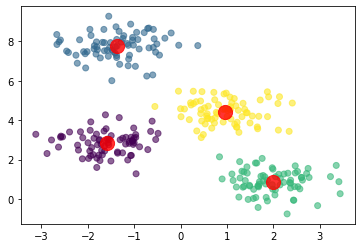

In [9]:
graph.scatter(x[:, 0], x[:, 1], c=y_kmeans, cmap='viridis', alpha=0.6)

centers = kmeans.cluster_centers_
graph.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.8)
graph.show()

# k-Means Algorithm: Expectation–Maximization

Starts by assigning random clusters. Then do E step, where updates our expectations of which cluster each point belongs to. Then 'M' step, where maximize some itness function that defines the location of the cluster centers (here it's by taking a mean of the data in each cluster)

In [13]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, r_seed=2):
    # Randomly choose clusters
    rng = np.random.RandomState(r_seed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # Assign labels based on closers center
        labels = pairwise_distances_argmin(X, centers)
        
        # Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        # check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
        
    return centers, labels

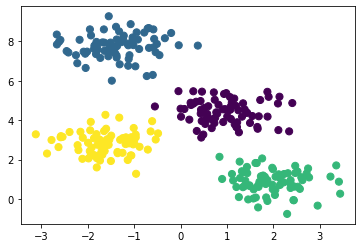

In [14]:
centers, labels = find_clusters(x, 4)

graph.scatter(x[:, 0], x[:, 1], c=labels, s=50, cmap='viridis')
graph.show()

# Caveats of Expectation-Maximization

No assurance that it will lead to gloabal best solution

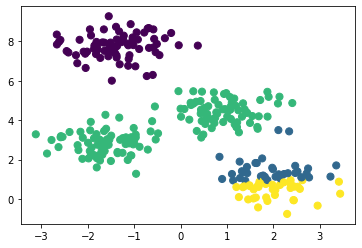

In [17]:
centers, labels = find_clusters(x, 4, r_seed=0)

graph.scatter(x[:, 0], x[:, 1], c=labels,
            s=50, cmap='viridis')
graph.show()

Hence, algorithm usually has multiple starting guesses, 'init' on sklearn Kmeans

### Number clusters must be selected before hand

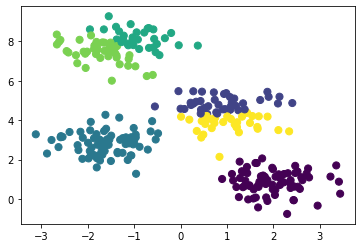

In [18]:
labels = KMeans(6, random_state=0).fit_predict(x)

graph.scatter(x[:, 0], x[:, 1], c=labels,
            s=50, cmap='viridis')
graph.show()

### k-means is limited to linear cluster boundaries

In [19]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

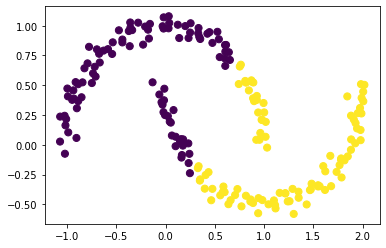

In [20]:
labels = KMeans(2, random_state=0).fit_predict(X)

graph.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis')
graph.show()

/home/arshad/miniconda3/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


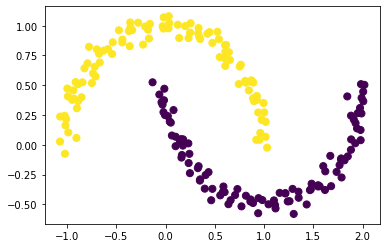

In [22]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(X)

graph.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
graph.show()

### Kmeans can be slow for large number of samples

# Kmeans on digits

In [23]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [24]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
print(kmeans.cluster_centers_.shape)

(10, 64)


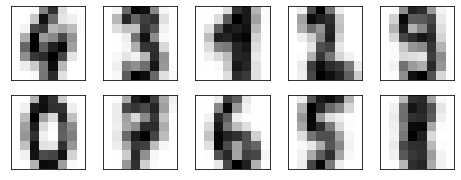

In [25]:
fig, ax = graph.subplots(2, 5, figsize=(8,3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)

for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=graph.cm.binary)

In [26]:
from scipy.stats import mode

labels = np.zeros_like(clusters)

for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [27]:
from sklearn.metrics import accuracy_score

accuracy_score(digits.target, labels)

0.7952142459654981

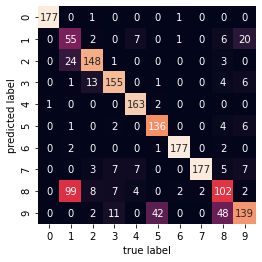

In [28]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(digits.target, labels)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
graph.xlabel('true label')
graph.ylabel('predicted label')
graph.show()

In [29]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# Compute the clusters

kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# permute the labels

labels = np.zeros_like(clusters)

for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]
    
# Compute the accuracy
accuracy_score(digits.target, labels)

0.9371174179187535

# Kmeans for color compression

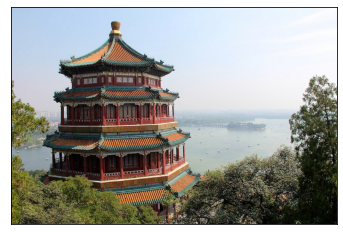

In [30]:
from sklearn.datasets import load_sample_image

china = load_sample_image('china.jpg')

ax = graph.axes(xticks=[], yticks=[])
ax.imshow(china)
graph.show()

In [31]:
print(china.shape)

(427, 640, 3)


In [32]:
data = china / 255
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [38]:
def plot_pixels(data, title, colors=None, N = 10000):
    if colors is None:
        colors = data
    
    # choose random subset
    
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = graph.subplots(1, 2, figsize = (16, 6))
    
    ax[0].scatter(R, G, color = colors, marker = '.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
    
    ax[1].scatter(R, B, color = colors, marker = '.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
    
    fig.suptitle(title, size=20)

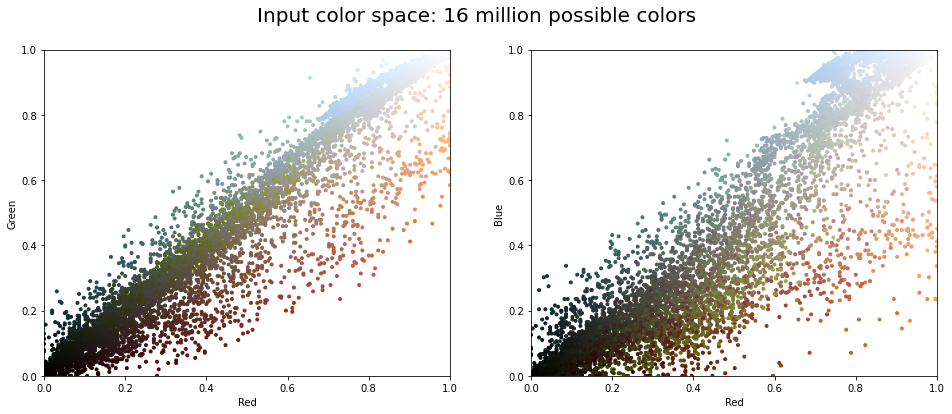

In [39]:
plot_pixels(data, title='Input color space: 16 million possible colors')

In [40]:
import warnings; warnings.simplefilter('ignore')

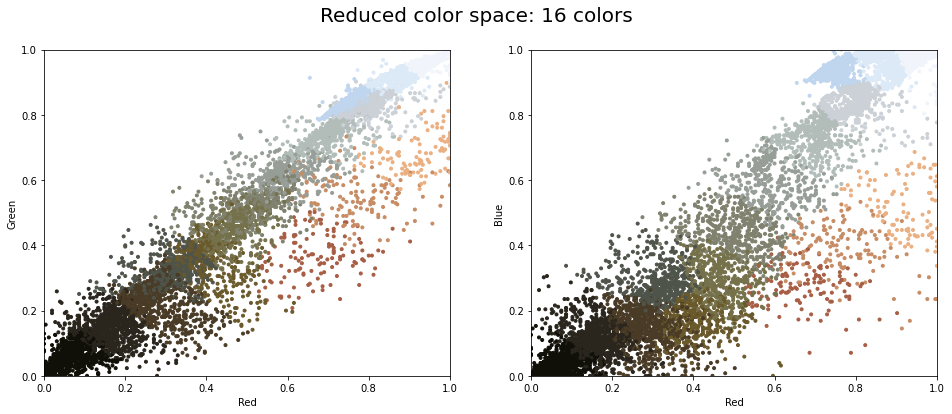

In [42]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(16)
kmeans.fit(data)

new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors, title='Reduced color space: 16 colors')

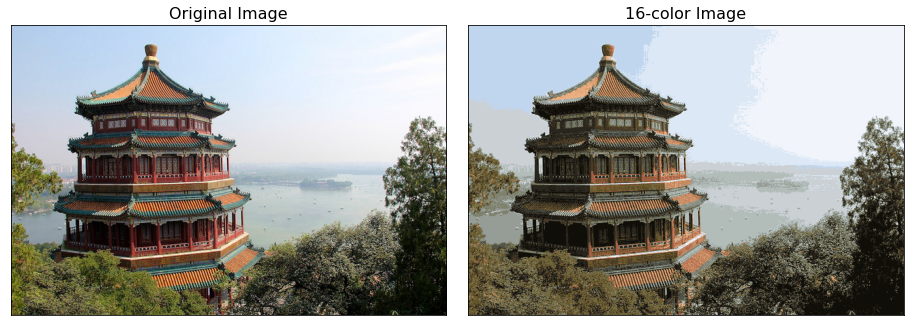

In [43]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = graph.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)

ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)

ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16)
graph.show()